In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as skmts
import sklearn.preprocessing as skpre
import scipy.stats as scistat
import glob
import pickle
import statsmodels.stats.multitest as multi
plt.style.use('fivethirtyeight')
%matplotlib inline

In [132]:
def get_perRegion_performance(data_path):
    """return overall performance across folds
    :param data_path: path to model_prediction.txt
    """
    # collect files
    df_list = []
    bdf_list = [] # for baseline
    for f in glob.glob(data_path+'*.model_prediction.txt'):
        df = pd.read_csv(f, header=0, sep="\t")
        
        # get per-region performance
        area_list, auprc_list, auroc_list = [], [], []
        barea_list, bauprc_list, bauroc_list = [], [], [] # for baseline model
        region_list = sorted(df['region_label'].unique())
        grps = df.groupby(['region_label'])
        for region in region_list:
            sample = grps.get_group(region)
            auc = skmts.roc_auc_score(sample['synergy_label'], sample['predicted_synergy'])
            auprc = skmts.average_precision_score(sample['synergy_label'], sample['predicted_synergy'])
            
            area_list.append(region)
            auprc_list.append(auprc)
            auroc_list.append(auc)
            
            # add baseline
            n_pos = (sample['synergy_label']==1).sum()
            n_neg = (sample['synergy_label']==0).sum()
            if n_pos >= n_neg:
                sample['predicted_synergy'] = 0.6
            else:
                sample['predicted_synergy'] = 0.4
            auc = skmts.roc_auc_score(sample['synergy_label'], sample['predicted_synergy'])
            auprc = skmts.average_precision_score(sample['synergy_label'], sample['predicted_synergy'])
            barea_list.append(region)
            bauprc_list.append(auprc)
            bauroc_list.append(auc)
        # merge all
        table = pd.DataFrame({'Region':area_list,
                              'AUPRC':auprc_list,
                              'AUROC':auroc_list})
        df_list.append(table)
        
        btable = pd.DataFrame({'Region':barea_list,
                               'AUPRC':bauprc_list,
                               'AUROC':bauroc_list})
        bdf_list.append(btable)
    df = pd.concat(df_list, axis=0)
    bdf = pd.concat(bdf_list, axis=0)
    
    df['Region'] = df['Region'].replace({0:'high_low', 1:'high', 2:'low', 3:'low_high'})
    bdf['Region'] = bdf['Region'].replace({0:'high_low', 1:'high', 2:'low', 3:'low_high'})
    if len(df) != 40:
        raise ValueError(f'Error, size should be 40, but got{len(df)}')
    return df, bdf

In [133]:
data_path = '../../hypergraph_models/classification/random_split/EXP/c2/DRUG_CELL_DDSE/transform_ssGSEA/'
c2_df, baseline_df = get_perRegion_performance(data_path)

c2_df.describe()

/tmp/ipykernel_2518802/198590085.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['predicted_synergy'] = 0.6
/tmp/ipykernel_2518802/198590085.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['predicted_synergy'] = 0.6
/tmp/ipykernel_2518802/198590085.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,AUPRC,AUROC
count,40.000000,40.000000
mean,0.849363,0.724611
std,0.076377,0.028615
min,0.721909,0.655926
25%,0.801744,0.699224
50%,0.851875,0.730899
75%,0.898092,0.745121
max,0.962152,0.769026


In [134]:
data_path = '../../hypergraph_models/classification/random_split/EXP/c3/DRUG_CELL_DOSE/transform_ssGSEA/kmer9/'
c3_df, baseline_df = get_perRegion_performance(data_path)
c3_df.describe()

/tmp/ipykernel_2518802/198590085.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['predicted_synergy'] = 0.6
/tmp/ipykernel_2518802/198590085.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['predicted_synergy'] = 0.6
/tmp/ipykernel_2518802/198590085.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,AUPRC,AUROC
count,40.000000,40.000000
mean,0.867611,0.748297
std,0.063379,0.032522
min,0.714884,0.687011
25%,0.830670,0.725145
50%,0.865759,0.750307
75%,0.901481,0.771687
max,0.963504,0.809273


In [135]:
baseline_df

,Region,AUPRC,AUROC
0,high_low,0.662991,0.5
1,high,0.520653,0.5
2,low,0.890993,0.5
3,low_high,0.739437,0.5
0,high_low,0.664212,0.5
1,high,0.484000,0.5
2,low,0.890771,0.5
3,low_high,0.745763,0.5
0,high_low,0.654925,0.5
1,high,0.506289,0.5


In [136]:
c2_df['Model'] = 'SAFER-C2'
c3_df['Model'] = 'SAFER-C3'
baseline_df['Model'] = 'baseline'

df = pd.concat([c2_df, c3_df, baseline_df], axis=0)
df

,Region,AUPRC,AUROC,Model
0,high_low,0.815278,0.694172,SAFER-C2
1,high,0.768327,0.752742,SAFER-C2
2,low,0.958734,0.746371,SAFER-C2
3,low_high,0.882492,0.723042,SAFER-C2
0,high_low,0.840071,0.733669,SAFER-C2
...,...,...,...,...
3,low_high,0.749485,0.500000,baseline
0,high_low,0.685361,0.500000,baseline
1,high,0.513661,0.500000,baseline
2,low,0.866836,0.500000,baseline


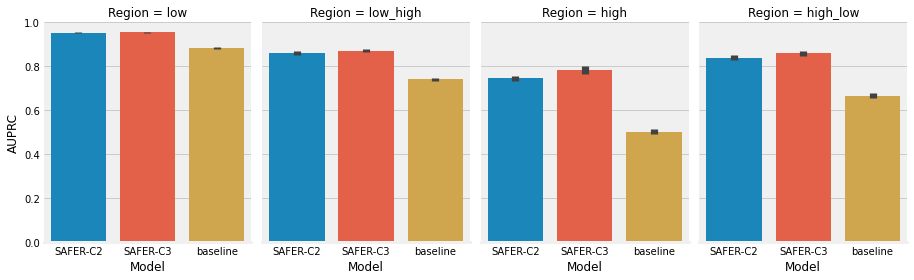

In [145]:
g = sns.catplot(
    data=df, x="Model", y="AUPRC", col="Region",
    kind="bar", height=4, aspect=.8,col_order=['low', 'low_high','high', 'high_low'],
)

g.set(ylim=(0, 1))
g.despine(left=True)
plt.savefig('catplot_auprc.jpeg', format='jpeg', dpi=300)

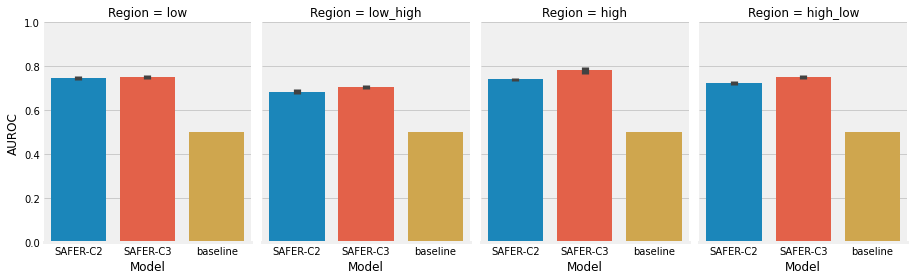

In [146]:
g = sns.catplot(
    data=df, x="Model", y="AUROC", col="Region",
    kind="bar", height=4, aspect=.8,col_order=['low', 'low_high','high', 'high_low'],
)

g.set(ylim=(0, 1))
g.despine(left=True)
plt.savefig('catplot_auroc.jpeg', format='jpeg', dpi=300)

In [96]:
df.groupby(['Model', 'Region']).agg('mean')

AUPRC     AUROC
Model    Region                      
SAFER-C2 high      0.745208  0.742097
         high_low  0.839394  0.724545
         low       0.953493  0.746406
         low_high  0.859356  0.685396
SAFER-C3 high      0.785783  0.781973
         high_low  0.858910  0.753485
         low       0.954603  0.750525
         low_high  0.871146  0.707204

In [97]:
df.groupby(['Model', 'Region']).agg('std')

AUPRC     AUROC
Model    Region                      
SAFER-C2 high      0.020407  0.011595
         high_low  0.017690  0.015775
         low       0.005995  0.015817
         low_high  0.013790  0.018398
SAFER-C3 high      0.032102  0.026277
         high_low  0.016386  0.015979
         low       0.005753  0.015710
         low_high  0.011327  0.014797

# Baseline

In [116]:
def get_perRegion_performance(data_path):
    """return overall performance across folds
    :param data_path: path to model_prediction.txt
    """
    # collect files
    df_list = []
    for f in glob.glob(data_path+'*.model_prediction.txt'):
        df = pd.read_csv(f, header=0, sep="\t")
        
        # get per-region performance
        area_list, auprc_list, auroc_list = [], [], []
        region_list = sorted(df['region_label'].unique())
        grps = df.groupby(['region_label'])
        for region in region_list:
            sample = grps.get_group(region)
            
            n_pos = (sample['synergy_label']==1).sum()
            n_neg = (sample['synergy_label']==0).sum()
            if n_pos >= n_neg:
                sample['predicted_synergy'] = 0.6
            else:
                sample['predicted_synergy'] = 0.4
                
                
            auc = skmts.roc_auc_score(sample['synergy_label'], sample['predicted_synergy'])
            auprc = skmts.average_precision_score(sample['synergy_label'], sample['predicted_synergy'])
            
            area_list.append(region)
            auprc_list.append(auprc)
            auroc_list.append(auc)
        table = pd.DataFrame({'Region':area_list,
                              'AUPRC':auprc_list,
                              'AUROC':auroc_list})
        df_list.append(table)
    df = pd.concat(df_list, axis=0)
    if len(df) != 40:
        raise ValueError(f'Error, size should be 40, but got{len(df)}')
    return df

data_path = '../../hypergraph_models/classification/random_split/EXP/c2/DRUG_CELL_DDSE/transform_ssGSEA/'
c2_df = get_perRegion_performance(data_path)
c2_df['Region'] = c2_df['Region'].replace({0:'high_low', 1:'high', 2:'low', 3:'low_high'})
c2_df.groupby(['Region']).agg('mean')

/tmp/ipykernel_2518802/3296716376.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['predicted_synergy'] = 0.6
/tmp/ipykernel_2518802/3296716376.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['predicted_synergy'] = 0.6
/tmp/ipykernel_2518802/3296716376.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

/tmp/ipykernel_2518802/3296716376.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['predicted_synergy'] = 0.6
/tmp/ipykernel_2518802/3296716376.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['predicted_synergy'] = 0.6
/tmp/ipykernel_2518802/3296716376.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,AUPRC,AUROC
Region,,
high,0.502162,0.5
high_low,0.666246,0.5
low,0.883487,0.5
low_high,0.741328,0.5


In [117]:
data_path = '../../hypergraph_models/classification/random_split/EXP/c3/DRUG_CELL_DOSE/transform_ssGSEA/kmer9/'
c3_df = get_perRegion_performance(data_path)
c3_df['Region'] = c3_df['Region'].replace({0:'high_low', 1:'high', 2:'low', 3:'low_high'})
c3_df.groupby(['Region']).agg('mean')

/tmp/ipykernel_2518802/3296716376.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['predicted_synergy'] = 0.6
/tmp/ipykernel_2518802/3296716376.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['predicted_synergy'] = 0.6
/tmp/ipykernel_2518802/3296716376.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

/tmp/ipykernel_2518802/3296716376.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['predicted_synergy'] = 0.6
/tmp/ipykernel_2518802/3296716376.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['predicted_synergy'] = 0.6
/tmp/ipykernel_2518802/3296716376.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,AUPRC,AUROC
Region,,
high,0.502162,0.5
high_low,0.666246,0.5
low,0.883487,0.5
low_high,0.741328,0.5
